## Import libraries

In [45]:
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [7]:
df = pd.read_excel('data/Assessment_Week4.xlsx', index_col='Month', parse_dates=True)

In [11]:
df.columns = ['Sales']

## Decomposing the Time Series
Now we will be decomposing the Time Series and will look for Levels, Trends and Seasonality in the data.

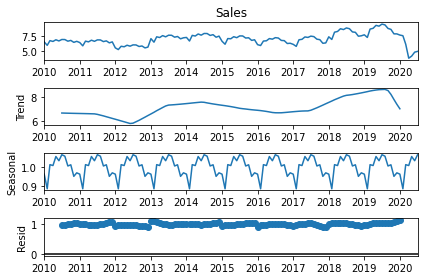

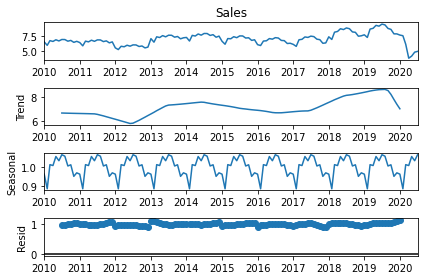

In [15]:
decompose_result = seasonal_decompose(df['Sales'], model='multiplicative')
decompose_result.plot()

## Fitting the Data with Holt-Winters Exponential Smoothing
Now we shall fit this data on Single, Double, and Triple Exponential Smoothing respectively, and will see how it performs.
Before starting with the models, we shall first define the weight coefficient Alpha and the Time Period. We also set the DateTime frequency to a monthly level.

In [16]:
# Set the frequency of the date time index as Monthly start as indicated by the data
df.index.freq = 'MS'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

### Single HWES

C:\Users\matth\conda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:title={'center':'Holt Winters Single Exponential Smoothing'}, xlabel='Month'>

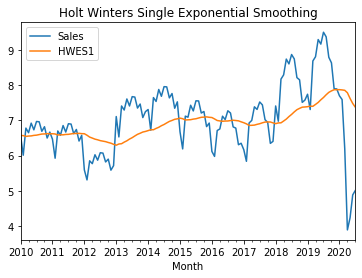

In [22]:
df['HWES1'] = SimpleExpSmoothing(df['Sales']).fit(smoothing_level=alpha,optimized=False, use_brute=True).fittedvalues

# plot the result
df[['Sales', 'HWES1']].plot(title='Holt Winters Single Exponential Smoothing')

As expected, it didn’t fit quite well, and rightfully so, because if we remember, Single ES doesn’t work for data with Trends and Seasonality.

### Double HWES
So, we’d fit the data on Double ES, on both Additive and Multiplicative Trend.

C:\Users\matth\conda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:title={'center':'Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend'}, xlabel='Month'>

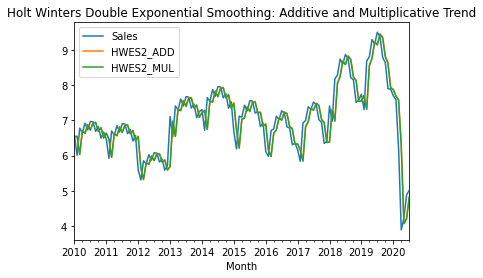

In [24]:
df['HWES2_ADD'] = ExponentialSmoothing(df['Sales'], trend='add').fit().fittedvalues
df['HWES2_MUL'] = ExponentialSmoothing(df['Sales'], trend='mul').fit().fittedvalues
df[['Sales','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')

Well, this looks a little better, but since we know there is Seasonality, we shall move into Triple ES and look at how it fits.

### Triple HWES

C:\Users\matth\conda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:title={'center':'Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality'}, xlabel='Month'>

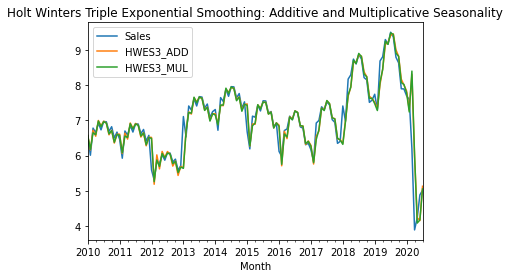

In [27]:
df['HWES3_ADD'] = ExponentialSmoothing(df['Sales'], trend='add', seasonal='add', seasonal_periods=12).fit().fittedvalues
df['HWES3_MUL'] = ExponentialSmoothing(df['Sales'], trend='mul',seasonal='mul', seasonal_periods=12).fit().fittedvalues
df[['Sales','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality')

This looks promising! Here we have plotted for both Additive and Multiplicative Seasonality.

## Forecasting with Holt-Winters Exponential Smoothing (Triple ES)

In [36]:
forecast_df = pd.read_excel('data/Assessment_Week4.xlsx', index_col='Month', parse_dates=True)
forecast_df.index.freq = 'MS'
forecast_df.columns = ['Sales']

In [42]:
# Split train and test data
train_sale = forecast_df[:90]
test_sale = forecast_df[90:]

C:\Users\matth\conda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

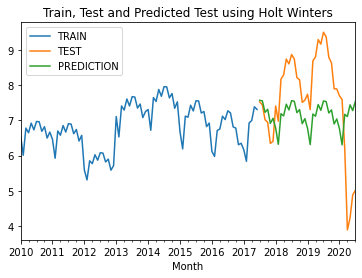

In [52]:
fitted_model = ExponentialSmoothing(train_sale['Sales'], trend='mul', seasonal='mul', seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(37)

# plotting the result
train_sale['Sales'].plot(legend=True, label='TRAIN')
test_sale['Sales'].plot(legend=True, label='TEST', figsize=(6,4))
test_predictions.plot(legend=True, label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

## Evaluation Metrics
Let’s see how the model has fared in terms of error term calculations. We would be using MAE(Mean Absolute Error) and MSE(Mean Squared Error) as metrics.

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'Mean Absolute Error = {mean_absolute_error(test_sale,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test_sale,test_predictions)}')

Mean Absolute Error = 1.2300238695831414
Mean Squared Error = 2.070049135290105


In [56]:
df

,Sales,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
Month,,,,,,
2010-01-01,6.567375,6.567375,6.529060,6.529923,6.567371,6.567425
2010-02-01,6.008375,6.567375,6.552150,6.542061,6.159047,6.174455
2010-03-01,6.780000,6.544083,6.039523,6.029759,6.720705,6.648248
2010-04-01,6.648750,6.553913,6.708835,6.698059,6.549285,6.592787
2010-05-01,6.921125,6.557865,6.641364,6.629964,6.996739,6.981433
...,...,...,...,...,...,...
2020-03-01,6.194000,7.854366,7.588767,7.573717,8.304580,8.400800
2020-04-01,3.885125,7.785184,6.292945,6.281105,5.963285,6.022968
2020-05-01,4.230000,7.622681,4.064777,4.059800,4.233114,4.079525
